In [1]:
# this is copied from (23.12)(comp)tf_idf_transfoer-Copy1 (non-binary)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from ast import literal_eval
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.decomposition import TruncatedSVD

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

In [13]:
xcf_comp_train=pd.read_csv('datasets/(14.07)xcf_comp_train_df.csv',index_col=0)
ars_comp_train=pd.read_csv('datasets/(14.07)ars_comp_train_df.csv',index_col=0)
kb_comp_train=pd.read_csv('datasets/(14.07)kb_comp_train_df.csv',index_col=0)

In [14]:
xcf_comp_test=pd.read_csv('datasets/(14.07)xcf_comp_test_df.csv',index_col=0)
ars_comp_test=pd.read_csv('datasets/(14.07)ars_comp_test_df.csv',index_col=0)
kb_comp_test=pd.read_csv('datasets/(14.07)kb_comp_test_df.csv',index_col=0)

In [15]:
xcf_train_X=xcf_comp_train.drop('class',axis=1)
ars_train_X=ars_comp_train.drop('class',axis=1)
kb_train_X=kb_comp_train.drop('class',axis=1)

xcf_train_y=xcf_comp_train['class']
ars_train_y=ars_comp_train['class']
kb_train_y=kb_comp_train['class']

In [16]:
xcf_test_X=xcf_comp_test.drop('class',axis=1)
ars_test_X=ars_comp_test.drop('class',axis=1)
kb_test_X=kb_comp_test.drop('class',axis=1)

xcf_test_y=xcf_comp_test['class']
ars_test_y=ars_comp_test['class']
kb_test_y=kb_comp_test['class']

## Union set of the ingredients

In [17]:
xcf_comp_set=set(xcf_train_X.columns.tolist())
ars_comp_set=set(ars_train_X.columns.tolist())
kb_comp_set=set(kb_train_X.columns.tolist())

In [18]:
print(len(xcf_comp_set))
print(len(ars_comp_set))
print(len(kb_comp_set))

1498
1496
1505


In [19]:
union_comp_set=xcf_comp_set|ars_comp_set|kb_comp_set
print(len(union_comp_set))
union_comp_list=list(union_comp_set)

1562


In [20]:
def get_origin_target_test_X(union_comp_list,origin_train_X,target_test_X):
    complement_ingrs=list(set(union_comp_list)-set(target_test_X.columns.tolist()))
    complement_tfidf=np.zeros((target_test_X.shape[0],len(complement_ingrs)))
    complement_tfidf=pd.DataFrame(complement_tfidf,columns=complement_ingrs)
    complement_target_test_tfidf=pd.concat([target_test_X,complement_tfidf],axis=1)
    origin_target_test_tfidf=complement_target_test_tfidf[origin_train_X.columns.tolist()]
    return origin_target_test_tfidf

In [21]:
# xiachufang --> allrecipes, kochbar

In [22]:
xcf_ars_test_tfidf=get_origin_target_test_X(union_comp_list,xcf_train_X,ars_test_X)
xcf_kb_test_tfidf=get_origin_target_test_X(union_comp_list,xcf_train_X,kb_test_X)

In [23]:
print(xcf_ars_test_tfidf.shape)
print(xcf_kb_test_tfidf.shape)

(640, 1498)
(560, 1498)


In [25]:
xcf_rf=RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=477,
                       random_state=42)

In [28]:
xcf_rf.fit(xcf_train_X,xcf_train_y)
xcf_pred_y=xcf_rf.predict(xcf_test_X)
print(accuracy_score(xcf_pred_y,xcf_test_y))

0.6577464788732394


In [29]:
xcf_rf.fit(xcf_train_X,xcf_train_y)
xcf_ars_pred_y=xcf_rf.predict(xcf_ars_test_tfidf)
print('xcf-->ars prediction accuracy: ', accuracy_score(xcf_ars_pred_y,ars_test_y))

xcf-->ars prediction accuracy:  0.5375


In [30]:
xcf_rf.fit(xcf_train_X,xcf_train_y)
xcf_kb_pred_y=xcf_rf.predict(xcf_kb_test_tfidf)
print('xcf-->kb prediction accuracy: ', accuracy_score(xcf_kb_pred_y,kb_test_y))

xcf-->kb prediction accuracy:  0.4607142857142857


In [31]:
# allrecipes --> xiachufang, kochbar

In [32]:
ars_rf=RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=411,
                       random_state=42)

In [33]:
ars_xcf_test_tfidf=get_origin_target_test_X(union_comp_list,ars_train_X,xcf_test_X)
ars_kb_test_tfidf=get_origin_target_test_X(union_comp_list,ars_train_X,kb_test_X)

In [34]:
ars_rf.fit(ars_train_X,ars_train_y)
ars_pred_y=ars_rf.predict(ars_test_X)
print(accuracy_score(ars_pred_y,ars_test_y))

0.6671875


In [35]:
ars_rf.fit(ars_train_X,ars_train_y)
ars_xcf_pred_y=ars_rf.predict(ars_xcf_test_tfidf)
print('ars-->xcf prediction accuracy: ',accuracy_score(ars_xcf_pred_y,xcf_test_y))

ars-->xcf prediction accuracy:  0.5169014084507042


In [36]:
ars_rf.fit(ars_train_X,ars_train_y)
ars_kb_pred_y=ars_rf.predict(ars_kb_test_tfidf)
print('ars-->kb prediction accuracy: ',accuracy_score(ars_kb_pred_y,kb_test_y))

ars-->kb prediction accuracy:  0.4714285714285714


In [37]:
# kochbar --> xiachufang, allrecipes

In [38]:
kb_log=LogisticRegression(C=100, random_state=9527)

In [39]:
kb_xcf_test_tfidf=get_origin_target_test_X(union_comp_list,kb_train_X,xcf_test_X)
kb_ars_test_tfidf=get_origin_target_test_X(union_comp_list,kb_train_X,ars_test_X)

In [40]:
kb_log.fit(kb_train_X, kb_train_y)
kb_pred_y=kb_log.predict(kb_test_X)
print(accuracy_score(kb_pred_y,kb_test_y))

0.6535714285714286


In [41]:
kb_log.fit(kb_train_X, kb_train_y)
kb_xcf_pred_y=kb_log.predict(kb_xcf_test_tfidf)
print('kb-->xcf prediction accuracy: ', accuracy_score(kb_xcf_pred_y,xcf_test_y))

kb-->xcf prediction accuracy:  0.48169014084507045


In [42]:
kb_log.fit(kb_train_X, kb_train_y)
kb_ars_pred_y=kb_log.predict(kb_ars_test_tfidf)
print('kb-->ars prediction accuracy: ', accuracy_score(kb_ars_pred_y,ars_test_y))

kb-->ars prediction accuracy:  0.51875


In [43]:
# visualization

In [44]:
accu_dict={'Xiachufang':[0.66,0.54,0.46],
           'Allrecipes':[0.52,0.67,0.47],
           'Kochbar':[0.48,0.52,0.65]}

In [45]:
accu_df=pd.DataFrame(accu_dict)

In [46]:
accu_df.index=['Xiachufang','Allrecipes','Kochbar']

In [47]:
accu_df

,Xiachufang,Allrecipes,Kochbar
Xiachufang,0.66,0.52,0.48
Allrecipes,0.54,0.67,0.52
Kochbar,0.46,0.47,0.65


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

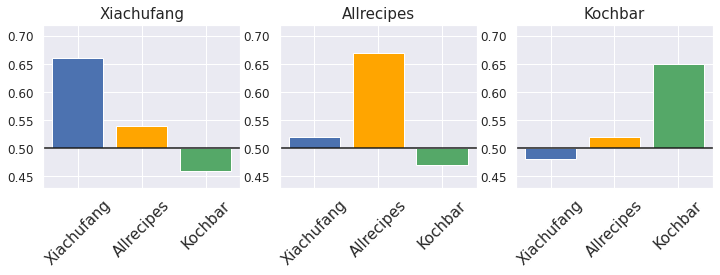

In [51]:
sns.set()
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
baseline=0.5
plt.bar([0,1,2],accu_df.Xiachufang-0.5,bottom=baseline,color=['b','orange','g'])
plt.xticks([0,1,2],accu_df.index,fontsize=15,rotation=45)
plt.yticks(fontsize=12)
plt.axhline(0.5,color='k') # 将baseline标注出来
plt.ylim(0.43,0.72)
plt.title('Xiachufang',fontsize=15)

plt.subplot(1,3,2)
baseline=0.5
plt.bar([0,1,2],accu_df.Allrecipes-0.5,bottom=baseline,color=['b','orange','g'])
plt.xticks([0,1,2],accu_df.index,fontsize=15,rotation=45)
plt.yticks(fontsize=12)
plt.axhline(0.5,color='k') # 将baseline标注出来
plt.ylim(0.43,0.72)
plt.title('Allrecipes',fontsize=15)

plt.subplot(1,3,3)
baseline=0.5
plt.bar([0,1,2],accu_df.Kochbar-0.5,bottom=baseline,color=['b','orange','g'])
plt.xticks([0,1,2],accu_df.index,fontsize=15,rotation=45)
plt.yticks(fontsize=12)
plt.axhline(0.5,color='k') # 将baseline标注出来
plt.ylim(0.43,0.72)
plt.title('Kochbar',fontsize=15)

plt.savefig('fig/pdf/comp_tfidf_cross_model.pdf',dpi=300,bbox_inches='tight')
plt.savefig('fig/png/comp_tfidf_cross_model.png',dpi=300,bbox_inches='tight')